In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap

cmap = get_cmap('bwr')

plt.style.use('seaborn-dark')

plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (15, 5)

from scipy import signal
from itertools import product

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm

In [3]:
from theory.core import TheoreticalWavelet, Pipe, Rock

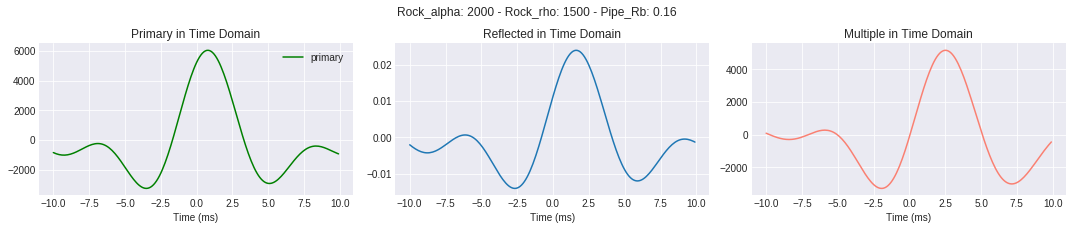

In [4]:
pipe = Pipe(Rb=.16, alpha=4875, rho=7200)
rock = Rock(2000, 1500)
wavelet = TheoreticalWavelet(pipe, rock, filter_duration=.1)

primary = wavelet.primary_in_time_domain(200, None, filtered=True)
reflected = wavelet.reflected_in_time_domain(200, None, filtered=True)
multiple = wavelet.multiple_in_time_domain(200, None, filtered=True)

time = wavelet.get_time_range_for_window(200)

fig, axes = plt.subplots(1, 3, figsize=(15,7.5/2.5), sharey=False)
axes[0].plot(time, primary, label='primary', color='green')
axes[0].set_title('Primary in Time Domain')
axes[0].legend()
axes[1].plot(time, reflected)
axes[1].set_title('Reflected in Time Domain')
axes[2].plot(time, multiple, color='salmon')
axes[2].set_title('Multiple in Time Domain')
for ax in axes.ravel():
    ax.set_xlabel('Time (ms)')
fig.suptitle('Rock_alpha: {} - Rock_rho: {} - Pipe_Rb: {}'.format(rock.alpha, rock.rho, pipe.Rb), y=1.05)
fig.tight_layout()

In [8]:
wavelet.sampling_rate

10000

In [11]:
wavelet.sampling_interval*1000

0.1

In [72]:
p = wavelet.primary_in_time_domain(None, None, filtered=True)

In [74]:
pd.Series(p).describe()

count    2.000000e+04
mean     8.881175e-04
std      2.629635e+02
min     -3.256037e+03
25%     -9.130310e-09
50%     -8.181214e-09
75%     -7.344834e-09
max      6.046988e+03
dtype: float64

In [80]:
pacorr = signal.correlate(p, p, method='fft')
h = int(len(pacorr)/2)
W = pacorr[h:h+4000]
W[0] = W[0]+1

In [48]:
from scipy.linalg import toeplitz, inv

In [46]:
A = toeplitz(pacorr)

In [47]:
b = np.r_[1, [0] * 3999]

In [50]:
c = inv(A)

In [61]:
W.shape

(4000,)

In [60]:
c.shape

(4000, 4000)

In [70]:
W

array([ 1.38292647e+09,  1.38001524e+09,  1.37129945e+09, ...,
       -2.93419241e-07, -3.01849616e-07, -2.86363506e-07])

In [68]:
np.dot(W/1e6, c)

array([-2.23073790e+17,  6.40320769e+17, -4.34516881e+17, ...,
        1.42853218e+16,  1.66477807e+17, -8.12419447e+16])

In [67]:
W[:, None] c

ValueError: object too deep for desired array

In [44]:
b.shape

(4000,)

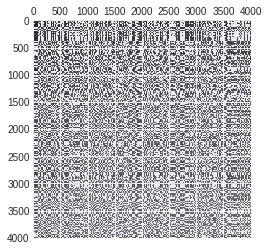

In [58]:
ax = plt.axes()
ax.matshow(np.log(c))

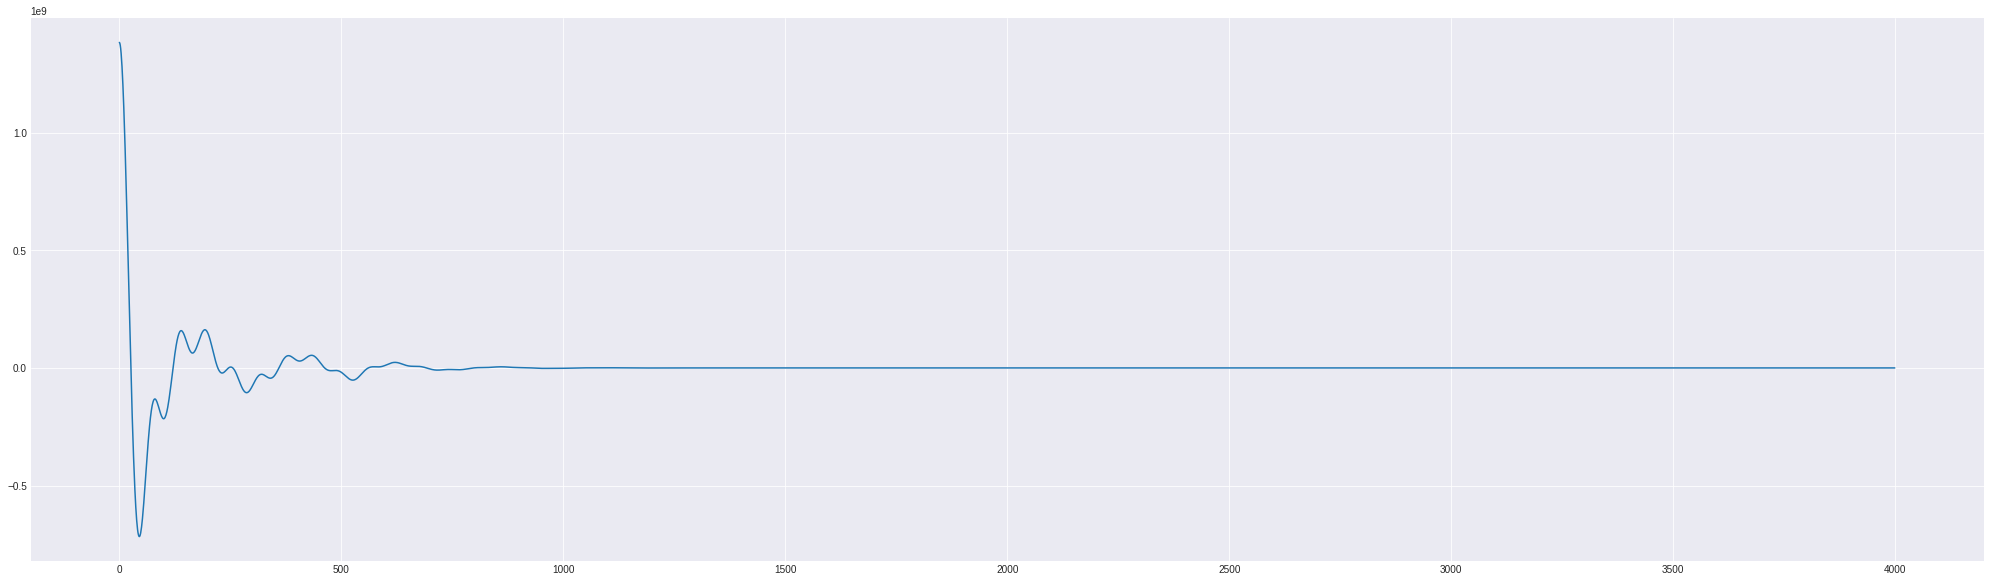

In [34]:
ax = plt.axes()
ax.plot(pacorr[h:h+4000])
ax.figure.set_size_inches(35, 10)